In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
rest=pd.read_csv("restaurant.csv")

In [3]:
rest.isnull().sum()

id                   0
facility_name        0
num                801
street               6
city                 7
state                7
zip                  7
municipal            3
category_cd          0
description          0
p_code              27
fdo                 44
bus_st_date         67
bus_cl_date      19246
seat_count       11537
noroom           24490
sq_feet          14781
status               0
placard_st        9948
x                 6651
y                 6651
address              0
dtype: int64

In [4]:
food= rest[['id', 'facility_name', 'city', 'zip']]

In [5]:
food.isnull().sum()

id               0
facility_name    0
city             7
zip              7
dtype: int64

In [6]:
#I decided to delete the rows that have a missing city or zipcode, because there are only 14 of them and about 
#25,500 overall entries I do not think it will skew the results or anything.
food["city"].fillna("Unknown", inplace=True)
food["zip"].fillna("0", inplace=True)
food = food[food['zip'] != 0]
food = food[food['city'] != "Unknown"]

/opt/tljh/user/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [7]:
food.isnull().sum()

id               0
facility_name    0
city             0
zip              0
dtype: int64

In [8]:
#Get rid of entries where the city is not Pittsburgh 
food= food[food['city'] == "Pittsburgh"]

In [9]:
#Look at the different zipcodes to see which one has the most food options
food['zip'].value_counts()

15222.0    1406
15212.0    1085
15213.0     947
15219.0     919
15237.0     824
15205.0     668
15206.0     624
15203.0     586
15235.0     548
15210.0     498
15221.0     484
15236.0     434
15224.0     429
15217.0     427
15201.0     400
15216.0     391
15238.0     341
15227.0     325
15220.0     321
15202.0     299
15215.0     289
15241.0     263
15231.0     252
15234.0     252
15226.0     245
15218.0     244
15208.0     236
15232.0     227
15228.0     225
15239.0     222
15209.0     215
15223.0     176
15229.0     161
15207.0     145
15275.0     144
15233.0     136
15214.0     136
15211.0     114
15204.0      99
15243.0      68
15261.0      48
15225.0      36
15282.0      31
15260.0       9
15276.0       7
15240.0       5
15230.0       3
15242.0       3
15244.0       1
15259.0       1
Name: zip, dtype: int64

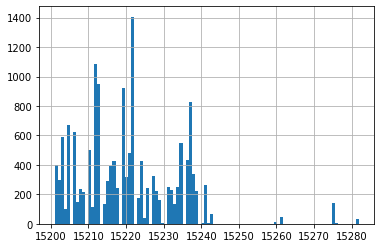

In [12]:
#This is a visualization of the above data, which is a good way of showing that 15222 does have the most food
#options in Pittsburgh
food["zip"].hist(bins=100)

Based on the above information, the best neighborhood to live in based on the amount of food options (restaurants, bars, and supermarkets) is 15222 (the Troy Hill neighborhood) which encompasses Downtown Pittsburgh. Amount of food options is a good measure of bestness, because people want to live in a neighborhood where there is a lot going on, and lots of people like to go out to bars and restaurants so food options seems like a perfect things to look at when measuring "bestness".